this notebook is for Week12-Assignment
author: Rui Zeng, N15471955, rz2522@nyu.edu
Assignment:
- Make a jupyter notebook to analyze these simulations. 
	- Plot the energy versus time, as read in from the `.ener` file
	- Use mdtraj or mdanalysis to compute g(r) for the oxygens as you did before in our previous labs
		- Note that you have to set the box size. The box size is written in the xyz file and input file, and it is constant for the whole simulation
	- For your own benefit, compare your g(r) for Oxygen to one from the litterature. For example, does it look like [this one](https://aip.scitation.org/na101/home/literatum/publisher/aip/journals/content/jcp/2016/jcp.2016.145.issue-19/1.4967719/20161117/images/large/1.4967719.figures.online.f12.jpeg)
	- Visualize the proton simulation using VMD
		- Use VDW for the atoms, and shrink the radii
		- Make another represenation of type dynamic bonding. Set the bond length so that you only see bonds between O-H
		- After some steps for the system to equilibration, find the hydronium molecule, and save a picture of it
		- If you can, make a movie of the proton hopping. This may be hard to track, but you should be able to see a few proton hopping events.
		- (Bonus) If you were doing this for research, you *could* make a movie like [this one](https://youtu.be/7de68dos3qY) from Prof. Andrew White. He explains how to track a specific atom in a tcl script on a [blog post](https://thewhitelab.org/blog/graphics/2020/03/08/vmd-movie-scripts/). But to do this, you will have to identify the *special oxygen*. You can look in the literature to see how this is defined. Knowledge of this position would be required to compute the MSD of hydronium ions

In [49]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf


In [133]:
# paths to files
energy_Water = '../Data/Water/water_aimd_1ps_every0.5fs-1.ener'
energy_Proton = '../Data/Proton/proton_aimd_1ps_every0.5fs-1.ener'
traj_Water = '../Data/Water/water_aimd_1ps_every0.5fs-pos-1.xyz'
traj_Proton = '../Data/Proton/proton_aimd_1ps_every0.5fs-pos-1.xyz'
top_Water = '../Data/Water/water.xyz'
top_Proton = '../Data/Proton/proton.xyz'

# box size
box = 12.42
# load data
energy_Water = np.loadtxt(energy_Water)
energy_Proton = np.loadtxt(energy_Proton)
u_Water = mda.Universe(top_Water,traj_Water)
u_Water.dimensions= np.array([box,box,box,90,90,90])
u_Proton = mda.Universe(traj_Proton, traj_Proton)
u_Proton.dimensions= np.array([box,box,box,90,90,90])


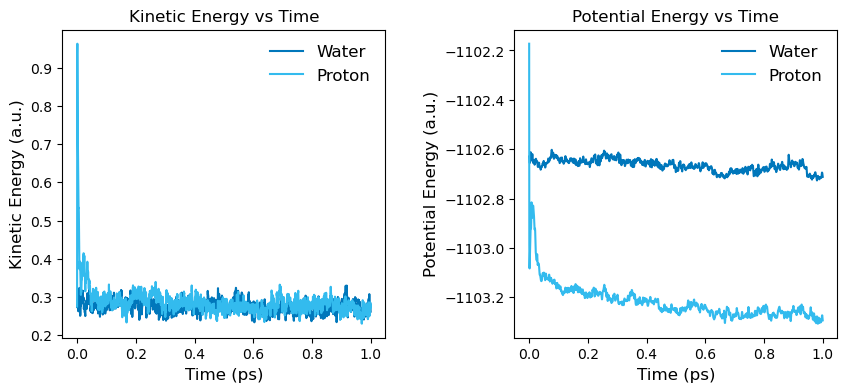

In [47]:
# figure 1 - energy versus time
ax, fig = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'wspace':0.4})

# set colorblind-friendly palatte 
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']

# plot energy
fig[0].plot(energy_Water[:,1]/1000, energy_Water[:,2], color=colors[0], label='Water')
fig[0].plot(energy_Proton[:,1]/1000, energy_Proton[:,2], color=colors[1], label='Proton')
# title and labels
fig[0].set_title('Kinetic Energy vs Time')
fig[0].set_xlabel('Time (ps)',fontsize=12)
fig[0].set_ylabel('Kinetic Energy (a.u.)',fontsize=12)
# legend
fig[0].legend(fontsize=12, frameon=False)

# plot energy
fig[1].plot(energy_Water[:,1]/1000, energy_Water[:,4], color=colors[0], label='Water')
fig[1].plot(energy_Proton[:,1]/1000, energy_Proton[:,4], color=colors[1], label='Proton')
# title and labels
fig[1].set_title('Potential Energy vs Time')
fig[1].set_xlabel('Time (ps)',fontsize=12)
fig[1].set_ylabel('Potential Energy (a.u.)',fontsize=12)
# legend
fig[1].legend(fontsize=12, frameon=False)

# save figure as pdf in ../Figures
fname = '../Figures/fig1.energy verses time.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')

In [149]:
# g(r) calculation with MDAnalysis
# select oxygen atoms
oxygens_Water = u_Water.select_atoms('name O')
oxygens_Proton = u_Proton.select_atoms('name O')
# calculate g(r) for water
g_Water = rdf.InterRDF(oxygens_Water,oxygens_Water,nbins=100, range=(0.0,box/2), verbose=True)
g_Proton = rdf.InterRDF(oxygens_Proton,oxygens_Proton,nbins=100, range=(0.0,box/2), verbose=True)
# run g(r) calculation
g_Water.run()
g_Proton.run()

  0%|          | 0/2001 [00:00<?, ?it/s]c:\ProgramData\Miniconda3\lib\site-packages\MDAnalysis\coordinates\base.py:892: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")
100%|██████████| 2001/2001 [00:03<00:00, 573.21it/s]


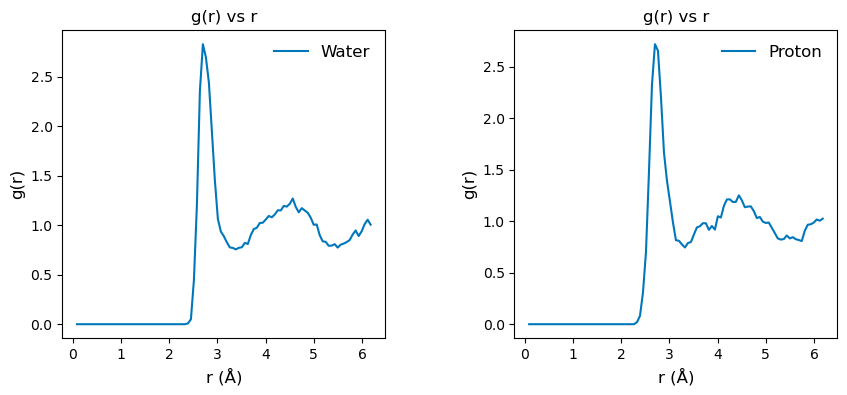

In [151]:
# figure 2 - g(r) versus r
ax, fig = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'wspace':0.4})

# set colorblind-friendly palatte 
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']

# plot g(r)
fig[0].plot(g_Water.bins[1:], g_Water.rdf[1:], color=colors[0], label='Water')
fig[1].plot(g_Proton.bins[1:], g_Proton.rdf[1:], color=colors[0], label='Proton')
# title and labels
fig[0].set_title('g(r) vs r')
fig[0].set_xlabel('r (Å)',fontsize=12)
fig[0].set_ylabel('g(r)',fontsize=12)
fig[1].set_title('g(r) vs r')
fig[1].set_xlabel('r (Å)',fontsize=12)
fig[1].set_ylabel('g(r)',fontsize=12)
# legend
fig[0].legend(fontsize=12, frameon=False)
fig[1].legend(fontsize=12, frameon=False)


# save figure as pdf in ../Figures
fname = '../Figures/fig2.g(r) versus r.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')